# Aula 13 - Processamento de Linguagem Natural

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Exercício e revisão da aula passada
- 2) Pré-processamento usando Word2Vec
- 3) Exercícios de NLP

## Voltando ao problema do twitter

In [13]:
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.stem.porter import PorterStemmer

In [14]:
# Pipeline - Text Preprocessing
def preprocessing(string, stemmer, stopwords=nltk.corpus.stopwords.words('english')):
    ###
    # Remove Numbers
    string = re.sub(r'\d', '', string)
    ###
    # Remove Special Characters
    string = re.sub(r"[^a-zA-Z0-9]+", ' ', string)
    ###
    # Lowercase words
    string = string.lower()
    ###
    # Word Tokenize
    words = word_tokenize(string)
    ###
    # Remove Stopwords
    filtered_words = []
    for w in words:
        if w not in stopwords:
            filtered_words.append(w)
    ###
    # Stemming Words
    stem_words = []
    for w in filtered_words:
        s_words = stemmer.stem(w)
        stem_words.append(s_words)
    ###
    return stem_words

In [15]:
stemmer = PorterStemmer()

In [16]:
tweets = pd.read_csv('../datasets/tweets.csv', index_col=0)

In [17]:
tweets.head()

,keyword,location,text,target
id,,,,
1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [18]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7613 entries, 1 to 10873
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   keyword   7552 non-null   object
 1   location  5080 non-null   object
 2   text      7613 non-null   object
 3   target    7613 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 297.4+ KB


In [19]:
tweets['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [20]:
# Preprocessando o texto

tweets["filtered_words"] = tweets['text'].apply(lambda x: preprocessing(x, stemmer))

In [21]:
X = tweets['filtered_words']
y = tweets['target']

In [22]:
X

id
1        [deed, reason, earthquak, may, allah, forgiv, us]
4             [forest, fire, near, la, rong, sask, canada]
5        [resid, ask, shelter, place, notifi, offic, ev...
6        [peopl, receiv, wildfir, evacu, order, califor...
7        [got, sent, photo, rubi, alaska, smoke, wildfi...
                               ...                        
10869    [two, giant, crane, hold, bridg, collaps, near...
10870    [aria, ahrari, thetawniest, control, wild, fir...
10871      [utc, km, volcano, hawaii, http, co, zdtoydebj]
10872    [polic, investig, e, bike, collid, car, littl,...
10873    [latest, home, raze, northern, california, wil...
Name: filtered_words, Length: 7613, dtype: object

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                     y, 
                                                     test_size = 0.3, 
                                                     random_state = 42)

---
Usando word2vec

In [24]:
from gensim.models import Word2Vec

In [25]:
model = Word2Vec(sentences=X_train, vector_size=500, min_count=5, workers=2)

TypeError: __init__() got an unexpected keyword argument 'vector_size'

In [15]:
np.sum([np.array([1, 2]), np.array([2, 3])], axis=0)

array([3, 5])

In [16]:
X_train_w2v_m = []
X_train_w2v_s = []
X_train_w2v_sn = []


for phrase in X_train:
    vecs = []
    for word in phrase:
        if word in model.wv.index_to_key:
            vecs.append(model.wv.get_vector(word))
            
    if vecs:
        soma = np.sum(vecs, axis=0)
        media = soma/len(vecs)
        soma_normalizada = soma / np.linalg.norm(soma)
        
        X_train_w2v_m.append(media)
        X_train_w2v_s.append(soma)
        X_train_w2v_sn.append(soma_normalizada)
        
    else:
        X_train_w2v_m.append(np.zeros(model.vector_size))
        X_train_w2v_s.append(np.zeros(model.vector_size))
        X_train_w2v_sn.append(np.zeros(model.vector_size))
    
    
X_train_w2v_m = np.array(X_train_w2v_m)
X_train_w2v_s = np.array(X_train_w2v_s)
X_train_w2v_sn = np.array(X_train_w2v_sn)

In [19]:
X_train_w2v_m.shape

(5329, 500)

In [18]:
X_test_w2v_m = []
X_test_w2v_s = []
X_test_w2v_sn = []

for phrase in X_test:
    vecs = []
    for word in phrase:
        if word in model.wv.index_to_key:
            vecs.append(model.wv.get_vector(word))
            
    if vecs:
        soma = np.sum(vecs, axis=0)
        media = soma/len(vecs)
        soma_normalizada = soma / np.linalg.norm(soma)
        
        X_test_w2v_m.append(media)
        X_test_w2v_s.append(soma)
        X_test_w2v_sn.append(soma_normalizada)
        
    else:
        X_test_w2v_m.append(np.zeros(model.vector_size))
        X_test_w2v_s.append(np.zeros(model.vector_size))
        X_test_w2v_sn.append(np.zeros(model.vector_size))
    
    
X_test_w2v_m = np.array(X_test_w2v_m)
X_test_w2v_s = np.array(X_test_w2v_s)
X_test_w2v_sn = np.array(X_test_w2v_sn)

In [24]:
random_seed = 42

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

list_models_m = [
{'model_name': 'Logistic Regression',
 'estimator' : LogisticRegression(random_state = random_seed, 
                                  solver = 'lbfgs')},
{'model_name': 'Decision Tree',
 'estimator' : DecisionTreeClassifier(random_state = random_seed)},
{'model_name': 'Random Forest',
 'estimator' : RandomForestClassifier(random_state = random_seed)}, 
{'model_name': 'AdaBoost',
 'estimator' : AdaBoostClassifier(random_state = random_seed)}
]

list_models_s = [
{'model_name': 'Logistic Regression',
 'estimator' : LogisticRegression(random_state = random_seed, 
                                  solver = 'lbfgs')},
{'model_name': 'Decision Tree',
 'estimator' : DecisionTreeClassifier(random_state = random_seed)},
{'model_name': 'Random Forest',
 'estimator' : RandomForestClassifier(random_state = random_seed)}, 
{'model_name': 'AdaBoost',
 'estimator' : AdaBoostClassifier(random_state = random_seed)}
]

list_models_sn = [
{'model_name': 'Logistic Regression',
 'estimator' : LogisticRegression(random_state = random_seed, 
                                  solver = 'lbfgs')},
{'model_name': 'Decision Tree',
 'estimator' : DecisionTreeClassifier(random_state = random_seed)},
{'model_name': 'Random Forest',
 'estimator' : RandomForestClassifier(random_state = random_seed)}, 
{'model_name': 'AdaBoost',
 'estimator' : AdaBoostClassifier(random_state = random_seed)}
]

In [25]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

def test_models_plot_roc_auc_curve(model_list, col_model_name, col_model, X_train, X_test, y_train, y_test):
    for mdl in model_list:
        model = mdl[col_model]
        model.fit(X_train, y_train)
        y_predict = model.predict(X_test)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
        auc = metrics.roc_auc_score(y_test, model.predict(X_test))
        plt.plot(fpr, tpr, label='%s ROC (AUC = %0.2f)' % (mdl[col_model_name], auc))
        print("Model      : %s" % mdl[col_model_name])
        print("Accuracy   : %0.4f " %  accuracy_score(y_test, y_predict))
        print("Precision  : %0.4f " % precision_score(y_test, y_predict, average='weighted'))
        print("Recall     : %0.4f " % recall_score(y_test, y_predict, average='weighted'))
        print("F1 - Score : %0.4f " % f1_score(y_test, y_predict, average='weighted'))
        print("ROC - AUC  : %0.4f " % auc)
        print("======================")
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-AUC curve')
    plt.legend(loc="lower right")
    plt.show()

Model      : Logistic Regression
Accuracy   : 0.5657 
Precision  : 0.5340 
Recall     : 0.5657 
F1 - Score : 0.5081 
ROC - AUC  : 0.5136 
Model      : Decision Tree
Accuracy   : 0.6335 
Precision  : 0.6346 
Recall     : 0.6335 
F1 - Score : 0.6340 
ROC - AUC  : 0.6261 
Model      : Random Forest
Accuracy   : 0.7080 
Precision  : 0.7062 
Recall     : 0.7080 
F1 - Score : 0.7016 
ROC - AUC  : 0.6874 
Model      : AdaBoost
Accuracy   : 0.6642 
Precision  : 0.6603 
Recall     : 0.6642 
F1 - Score : 0.6603 
ROC - AUC  : 0.6477 


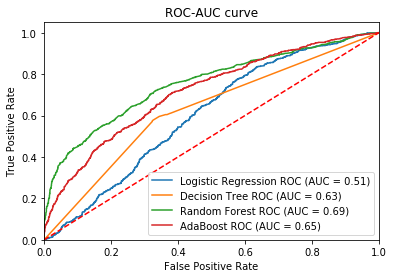

In [26]:
test_models_plot_roc_auc_curve(list_models_m,
                               "model_name",
                               "estimator",
                               X_train_w2v_m,
                               X_test_w2v_m,
                               y_train,
                               y_test)

Model      : Logistic Regression
Accuracy   : 0.6957 
Precision  : 0.6993 
Recall     : 0.6957 
F1 - Score : 0.6812 
ROC - AUC  : 0.6654 
Model      : Decision Tree
Accuracy   : 0.6305 
Precision  : 0.6304 
Recall     : 0.6305 
F1 - Score : 0.6304 
ROC - AUC  : 0.6213 
Model      : Random Forest
Accuracy   : 0.7198 
Precision  : 0.7194 
Recall     : 0.7198 
F1 - Score : 0.7129 
ROC - AUC  : 0.6982 
Model      : AdaBoost
Accuracy   : 0.6913 
Precision  : 0.6896 
Recall     : 0.6913 
F1 - Score : 0.6823 
ROC - AUC  : 0.6672 


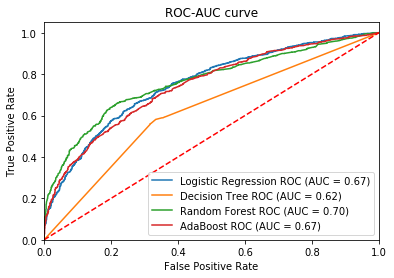

In [27]:
test_models_plot_roc_auc_curve(list_models_s,
                               "model_name",
                               "estimator",
                               X_train_w2v_s,
                               X_test_w2v_s,
                               y_train,
                               y_test)

Model      : Logistic Regression
Accuracy   : 0.5771 
Precision  : 0.3330 
Recall     : 0.5771 
F1 - Score : 0.4223 
ROC - AUC  : 0.5000 


/home/alexandre/anaconda2/envs/data_science/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model      : Decision Tree
Accuracy   : 0.6375 
Precision  : 0.6383 
Recall     : 0.6375 
F1 - Score : 0.6379 
ROC - AUC  : 0.6298 
Model      : Random Forest
Accuracy   : 0.7513 
Precision  : 0.7544 
Recall     : 0.7513 
F1 - Score : 0.7443 
ROC - AUC  : 0.7291 
Model      : AdaBoost
Accuracy   : 0.7023 
Precision  : 0.7006 
Recall     : 0.7023 
F1 - Score : 0.7011 
ROC - AUC  : 0.6916 


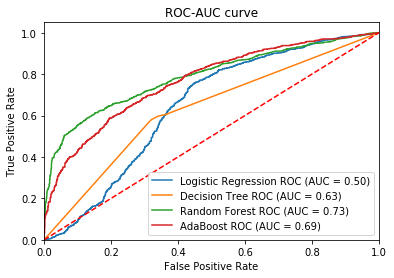

In [28]:
test_models_plot_roc_auc_curve(list_models_sn,
                               "model_name",
                               "estimator",
                               X_train_w2v_sn,
                               X_test_w2v_sn,
                               y_train,
                               y_test)

# Doc2Vec

In [29]:
from gensim.models import doc2vec

In [30]:
X_train

id
1707     [ash, australia, collaps, trent, bridg, among,...
5789     [great, michigan, techniqu, camp, bg, thank, b...
7789     [cnn, tennesse, movi, theater, shoot, suspect,...
8257               [still, riot, coupl, hour, left, class]
10656    [crack, path, wipe, morn, beach, run, surfac, ...
                               ...                        
7470      [egan, mani, obliter, server, alway, like, play]
7691     [panic, attack, bc, enough, money, drug, alcoh...
1242     [omron, hem, c, automat, blood, pressur, monit...
10862    [offici, say, quarantin, place, alabama, home,...
10409    [move, england, five, year, ago, today, whirlw...
Name: filtered_words, Length: 5329, dtype: object

In [31]:
def read_corpus(list_sentences, tokens_only=False):
    if tokens_only:
        # For test data, just return sentences
        return list_sentences
    else:
        # For training data, add tags
        lista = []
        for i, line in enumerate(list_sentences):
            lista.append(doc2vec.TaggedDocument(line, [i]))

        return lista

In [32]:
train_corpus = read_corpus(X_train)
test_corpus = read_corpus(X_test, tokens_only=True)

In [33]:
model = doc2vec.Doc2Vec(vector_size=50, min_count=2, epochs=20)

In [34]:
model.build_vocab(train_corpus)

In [35]:
model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)

In [36]:
X_train.iloc[0]

['ash',
 'australia',
 'collaps',
 'trent',
 'bridg',
 'among',
 'worst',
 'histori',
 'england',
 'bundl',
 'australia',
 'http',
 'co',
 'ttrhjuau']

In [37]:
frase = X_train.iloc[0]
model.infer_vector(frase)

array([-0.09944636,  0.2174004 ,  0.05077986,  0.10283918, -0.00025307,
       -0.15065275,  0.04830133, -0.104732  , -0.079697  ,  0.02616542,
       -0.04759101,  0.09666497,  0.05757032, -0.01903777, -0.08245407,
       -0.16542247,  0.03499356,  0.05142428, -0.15145469, -0.06167413,
        0.01672022,  0.11226355,  0.14083433, -0.1216763 ,  0.06392283,
       -0.05411164,  0.04574009, -0.04581688,  0.01362706, -0.04924901,
        0.10770597,  0.03626444,  0.02463052,  0.06490957, -0.04939566,
       -0.00814894, -0.02197774, -0.08570229,  0.01121528, -0.0118281 ,
       -0.07304405,  0.12721083, -0.02593724, -0.05384067,  0.14342928,
        0.01531663, -0.14792831, -0.03237535,  0.18588391,  0.0775895 ],
      dtype=float32)

In [38]:
model.wv.index_to_key

['co',
 'http',
 'like',
 'fire',
 'amp',
 'get',
 'bomb',
 'via',
 'news',
 'peopl',
 'new',
 'one',
 'go',
 'year',
 'video',
 'emerg',
 'time',
 'burn',
 'kill',
 'disast',
 'flood',
 'attack',
 'crash',
 'bodi',
 'day',
 'fatal',
 'build',
 'say',
 'look',
 'train',
 'u',
 'home',
 'would',
 'famili',
 'watch',
 'still',
 'got',
 'love',
 'see',
 'live',
 'us',
 'polic',
 'california',
 'come',
 'derail',
 'evacu',
 'want',
 'suicid',
 'make',
 'know',
 'scream',
 'man',
 'world',
 'car',
 'storm',
 'caus',
 'collaps',
 'back',
 'death',
 'think',
 'bag',
 'let',
 'first',
 'nuclear',
 'life',
 'take',
 'two',
 'work',
 'w',
 'use',
 'hiroshima',
 'youtub',
 'rt',
 'destroy',
 'wreck',
 'today',
 'full',
 'drown',
 'pm',
 'accid',
 'fuck',
 'war',
 'servic',
 'good',
 'old',
 'feel',
 'fear',
 'deton',
 'hijack',
 'help',
 'report',
 'need',
 'may',
 'obliter',
 'devast',
 'last',
 'murder',
 'plan',
 'dead',
 'could',
 'gt',
 'way',
 'weapon',
 'injuri',
 'rescu',
 'surviv',
 'wil

In [42]:
X_train_d2v = []

for phrase in X_train:
    vecs = []
    vecs.append(model.infer_vector(phrase))

    X_train_d2v.append(vecs)
    
X_train_d2v = np.array(X_train_d2v)

In [47]:
X_train_d2v = X_train_d2v[:,0,:]

In [56]:
X_test_d2v = []

for phrase in X_test:
    vecs = []
    vecs.append(model.infer_vector(phrase))

    X_test_d2v.append(vecs)
    
X_test_d2v = np.array(X_test_d2v)

In [57]:
X_test_d2v.shape

(2284, 1, 50)

In [58]:
X_test_d2v = X_test_d2v[:,0,:]

In [59]:
random_seed = 42

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

list_models_d2v = [
{'model_name': 'Logistic Regression',
 'estimator' : LogisticRegression(random_state = random_seed, 
                                  solver = 'lbfgs')},
{'model_name': 'Decision Tree',
 'estimator' : DecisionTreeClassifier(random_state = random_seed)},
{'model_name': 'Random Forest',
 'estimator' : RandomForestClassifier(random_state = random_seed)}, 
{'model_name': 'AdaBoost',
 'estimator' : AdaBoostClassifier(random_state = random_seed)}
]


Model      : Logistic Regression
Accuracy   : 0.7303 
Precision  : 0.7309 
Recall     : 0.7303 
F1 - Score : 0.7234 
ROC - AUC  : 0.7085 
Model      : Decision Tree
Accuracy   : 0.6449 
Precision  : 0.6425 
Recall     : 0.6449 
F1 - Score : 0.6433 
ROC - AUC  : 0.6325 
Model      : Random Forest
Accuracy   : 0.7548 
Precision  : 0.7555 
Recall     : 0.7548 
F1 - Score : 0.7498 
ROC - AUC  : 0.7360 
Model      : AdaBoost
Accuracy   : 0.7215 
Precision  : 0.7200 
Recall     : 0.7215 
F1 - Score : 0.7165 
ROC - AUC  : 0.7029 


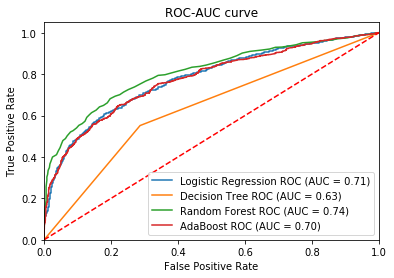

In [60]:
test_models_plot_roc_auc_curve(list_models_d2v,
                               "model_name",
                               "estimator",
                               X_train_d2v,
                               X_test_d2v,
                               y_train,
                               y_test)

In [63]:
y_pred = list_models_d2v[0]['estimator'].predict(X_test_d2v)

In [64]:
from sklearn.metrics import plot_confusion_matrix

((SHIFT))+((TAB))

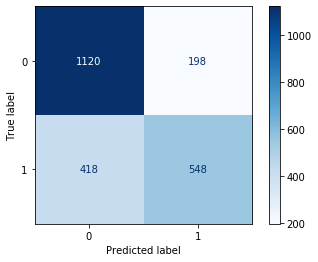

In [67]:
plot_confusion_matrix(list_models_d2v[0]['estimator'], X_test_d2v, y_test, cmap='Blues')
plt.show()

In [80]:
model = Word2Vec(sentences=X_train, vector_size=2, min_count=5, workers=2, sg=0)

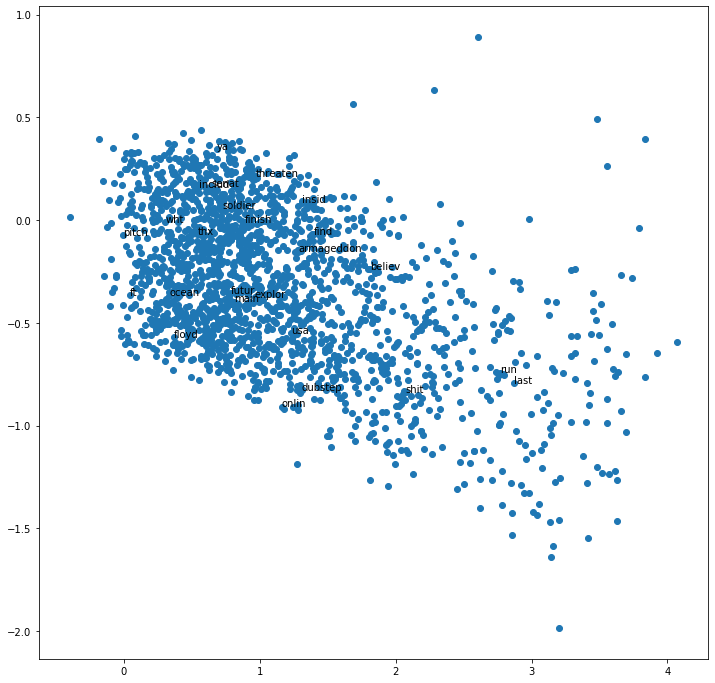

In [81]:
import random

vectors = np.asarray(model.wv.vectors)
labels = np.asarray(model.wv.index_to_key)  # fixed-width numpy strings

x_vals = [v[0] for v in vectors]
y_vals = [v[1] for v in vectors]

plt.figure(figsize=(12, 12))
plt.scatter(x_vals, y_vals)

indices = list(range(len(labels)))
sampled_indices = random.sample(indices, 25)
for i in sampled_indices:
    plt.annotate(labels[i], (x_vals[i], y_vals[i]))
    
plt.show()

In [70]:
model.wv.index_to_key

['co',
 'http',
 'like',
 'fire',
 'amp',
 'get',
 'bomb',
 'via',
 'news',
 'peopl',
 'new',
 'one',
 'go',
 'year',
 'video',
 'emerg',
 'time',
 'burn',
 'kill',
 'flood',
 'disast',
 'attack',
 'crash',
 'bodi',
 'day',
 'fatal',
 'build',
 'say',
 'look',
 'home',
 'train',
 'u',
 'would',
 'famili',
 'watch',
 'got',
 'still',
 'love',
 'see',
 'live',
 'california',
 'us',
 'polic',
 'come',
 'derail',
 'want',
 'evacu',
 'suicid',
 'make',
 'scream',
 'man',
 'know',
 'world',
 'car',
 'caus',
 'storm',
 'collaps',
 'back',
 'death',
 'think',
 'bag',
 'let',
 'life',
 'nuclear',
 'first',
 'two',
 'take',
 'work',
 'w',
 'use',
 'hiroshima',
 'youtub',
 'rt',
 'today',
 'full',
 'drown',
 'destroy',
 'wreck',
 'pm',
 'accid',
 'war',
 'fuck',
 'servic',
 'good',
 'fear',
 'report',
 'deton',
 'feel',
 'hijack',
 'help',
 'old',
 'need',
 'devast',
 'obliter',
 'may',
 'plan',
 'could',
 'last',
 'dead',
 'murder',
 'way',
 'gt',
 'injuri',
 'weapon',
 'rescu',
 'wildfir',
 'ma

In [77]:
model.wv.similarity('http', 'youtub')

0.8037381

In [82]:
model = Word2Vec(sentences=X_train, vector_size=2, min_count=5, workers=2, sg=1)

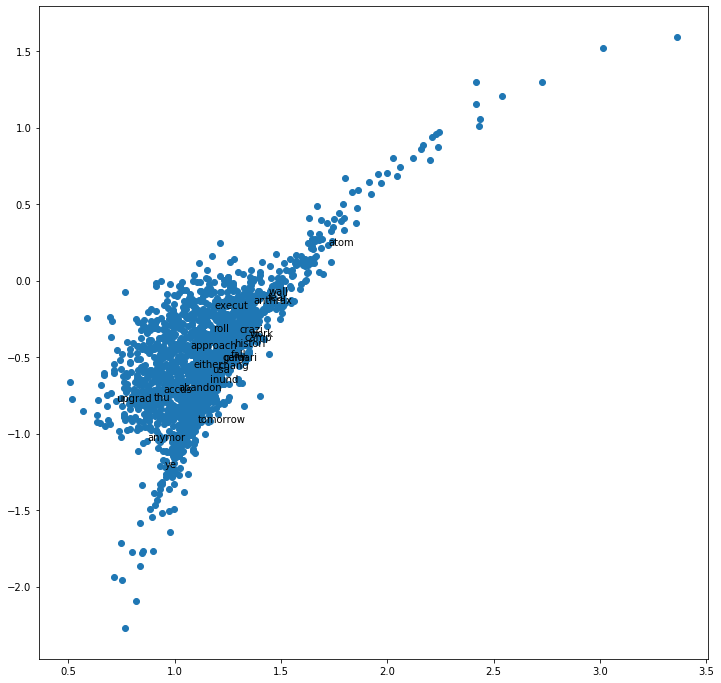

In [83]:
import random

vectors = np.asarray(model.wv.vectors)
labels = np.asarray(model.wv.index_to_key)  # fixed-width numpy strings

x_vals = [v[0] for v in vectors]
y_vals = [v[1] for v in vectors]

plt.figure(figsize=(12, 12))
plt.scatter(x_vals, y_vals)

indices = list(range(len(labels)))
sampled_indices = random.sample(indices, 25)
for i in sampled_indices:
    plt.annotate(labels[i], (x_vals[i], y_vals[i]))
    
plt.show()

## Exercícios

**1)** Vamos avaliar como isso afeta nosso modelo na base de dados de filmes, que fizemos na aula 12.1.